In [37]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import math
import pickle
from scipy import stats

In [9]:
user_data = open('dataset/user.json')

users = []

for line in user_data:
    users.append(json.loads(line))

In [56]:
friend_counts = []
for user in users:
    friend_counts.append(user["fans"])

print(len(friend_counts))

1326101


In [57]:
nonzero_friend_counts = [c for c in friend_counts if (c > 0 and c < 12000)]
print(len(nonzero_friend_counts))

291824


In [58]:
nonzero_friend_counts.sort()

In [59]:
n = len(nonzero_friend_counts)
q1 = nonzero_friend_counts[math.ceil(0.25 * n)]
q3 = nonzero_friend_counts[math.ceil(0.75 * n)]
print(q1)
print(q3)
IQR = q3 - q1
q1 = q1 - math.ceil(IQR*1.5)
if (q1 < 0):
    q1 = 0
q3 = q3 + math.ceil(IQR*1.5)
print(q1)
print(q3)

friend_count = []

for f in nonzero_friend_counts:
    if (f >= q1 and f <= q3):
        friend_count.append(f)
        
print(len(friend_count))

1
4
0
9
255445


686810
2.197768599894302
1.859996217962335


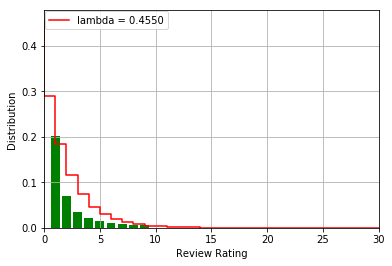

Ks_2sampResult(statistic=1.0, pvalue=1.5817216801977507e-45)

In [61]:
import seaborn as sns
n = len(review_star)
print(n)
data = [x for x in friend_count]

final_result = {}

for x in friend_count:
    if not x in final_result:
        final_result[x] = 0
    final_result[x] = final_result[x] + 1

X = []
E = []

def draw_graph(lam):
    z = 3
    X = range(0, 50)
    for i in X:
        E.append(lam*np.exp(-lam*i))

    s = "lambda = %.4f" % (lam)
    plt.step(X, E, label=s, color='r')
    plt.grid()
    plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.1)


x_label = list(final_result.keys())
y_label=[]

for x in list(final_result.values()):
    y_label.append(float(x)/n)

plt.xlabel('Review Rating')
plt.ylabel('Distribution')

plt.bar(x_label, y_label, color='g')

arr = np.array(data)
mean = arr.mean()
std = arr.std()
print(mean)
print(std)

lam = 1.0/float(mean)
#print(l)

#S = np.arange(0, 10, 0.1)

draw_graph(lam)
plt.savefig('elite_user_normal_distribution.png')
plt.xlim([0, 30])
plt.show()

stats.ks_2samp(E, data)